<a href="https://colab.research.google.com/github/CS-Edwards/ml_final/blob/main/C_Edwards_Data_Drag_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data is a Drag
## ICS 635 Machine Learning: Final Project
### by: Candace Edwards
Github: https://github.com/CS-Edwards/ml_final <br>
Notebook: [Link](https://colab.research.google.com/drive/1LilcQYvIRcnSTwTYoAQsbQidPFrZrLcR?usp=sharing)

### Notebook Setup

In [1]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, StratifiedKFold
from sklearn.metrics import make_scorer, log_loss, f1_score, confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings
from sklearn.exceptions import UndefinedMetricWarning, FitFailedWarning #, UserWarning




In [3]:
#
# Read in dataset
#
data = pd.read_csv('data/rpdr_data_final.csv')

## Data Prep:

In [4]:
data.head(10)

,season,contestant,age,dob,hometown,LOW,WIN,HIGH,BTM,SAFE,OUT,total_mcwins,total_mc,avg_rank,season_winner
0,S01,BEBE ZAHARA BENET,28,1981-03-20,"Minneapolis, Minnesota",0,3,1,1,2,0,0,4,1.0,1
1,S01,NINA FLOWERS,34,1974-02-22,"Bayamón, Puerto Rico",1,1,4,0,1,0,1,4,2.0,0
2,S01,REBECCA GLASSCOCK,26,1983-05-25,"Fort Lauderdale, Florida",1,1,1,3,1,0,1,4,3.0,0
3,S01,SHANNEL,26,1979-07-03,"Las Vegas, Nevada",1,0,1,2,2,1,0,4,4.0,0
4,S01,ONGINA,26,1982-01-06,"Los Angeles, California",0,2,2,1,0,2,1,4,5.0,0
5,S01,JADE,32,1984-11-18,"Chicago, Illinois",1,0,0,1,2,3,1,4,6.0,0
6,S01,AKASHIA,32,1985-02-19,"Cleveland, Ohio",0,0,0,3,0,4,1,4,7.0,0
7,S01,TAMMIE BROWN,36,1980-09-15,"Los Angeles, California",0,0,0,1,1,5,0,4,8.0,0
8,S01,VICTORIA PORKCHOP PARKER,39,1969-01-16,"Raleigh, North Carolina",0,0,0,1,0,6,0,4,9.0,0
9,S02,TYRA SANCHEZ,21,1988-04-22,"Orlando, Florida",1,4,2,0,3,0,1,9,1.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         184 non-null    object 
 1   contestant     184 non-null    object 
 2   age            184 non-null    int64  
 3   dob            184 non-null    object 
 4   hometown       184 non-null    object 
 5   LOW            184 non-null    int64  
 6   WIN            184 non-null    int64  
 7   HIGH           184 non-null    int64  
 8   BTM            184 non-null    int64  
 9   SAFE           184 non-null    int64  
 10  OUT            184 non-null    int64  
 11  total_mcwins   184 non-null    int64  
 12  total_mc       184 non-null    int64  
 13  avg_rank       183 non-null    float64
 14  season_winner  184 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 21.7+ KB


In [6]:
print(data.isna().sum())

season           0
contestant       0
age              0
dob              0
hometown         0
LOW              0
WIN              0
HIGH             0
BTM              0
SAFE             0
OUT              0
total_mcwins     0
total_mc         0
avg_rank         1
season_winner    0
dtype: int64


In [7]:
data['avg_rank'] = data['avg_rank'].fillna(-1)
print(data.isna().sum())

season           0
contestant       0
age              0
dob              0
hometown         0
LOW              0
WIN              0
HIGH             0
BTM              0
SAFE             0
OUT              0
total_mcwins     0
total_mc         0
avg_rank         0
season_winner    0
dtype: int64


In [8]:
#1. calculate mini challenge win percentage
#2. calulate  safe to top ratio
#3. train,test,split; y_pred is the winner 

In [9]:
#
#Normalize mini challenge wins as percentage
#
data['mcwins_pct'] = data['total_mcwins']/data['total_mc']
data['mcwins_pct'] = data['mcwins_pct'].fillna(-1)

In [10]:
#NEW METRIC: draft notes

#top to safe proportion: top placements relative to safe placements
# scale 0-1: 0 = never in the top but safe,  1 = never safe but in the top ; -1 to handle NaN values = never in the top and never safe
#initially tried ratio with smoothing parameter but that didn't work June Jumbalaya who had 0 safe and 0 high, had higher score than Shannel 2 safe 1 high
#smoothing = 0.1
#data['top_safe_ratio']= (data['WIN']+data['HIGH']+smoothing)/(data['SAFE'] + smoothing)

data['top_safe_ratio']= (data['WIN']+data['HIGH'])/(data['SAFE']+ data['WIN']+data['HIGH'])
data['top_safe_ratio'] = data['top_safe_ratio'].fillna(-1)



In [11]:
data

,season,contestant,age,dob,hometown,LOW,WIN,HIGH,BTM,SAFE,OUT,total_mcwins,total_mc,avg_rank,season_winner,mcwins_pct,top_safe_ratio
0,S01,BEBE ZAHARA BENET,28,1981-03-20,"Minneapolis, Minnesota",0,3,1,1,2,0,0,4,1.0,1,0.00,0.666667
1,S01,NINA FLOWERS,34,1974-02-22,"Bayamón, Puerto Rico",1,1,4,0,1,0,1,4,2.0,0,0.25,0.833333
2,S01,REBECCA GLASSCOCK,26,1983-05-25,"Fort Lauderdale, Florida",1,1,1,3,1,0,1,4,3.0,0,0.25,0.666667
3,S01,SHANNEL,26,1979-07-03,"Las Vegas, Nevada",1,0,1,2,2,1,0,4,4.0,0,0.00,0.333333
4,S01,ONGINA,26,1982-01-06,"Los Angeles, California",0,2,2,1,0,2,1,4,5.0,0,0.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,S14,MADDY MORPHOSIS,26,1994-09-02,"Fayetteville, Arkansas",0,0,0,2,3,9,0,6,10.0,0,0.00,0.000000
180,S14,ORION STORY,25,1996-06-25,"Grand Rapids, Michigan",0,0,0,2,2,10,0,6,11.0,0,0.00,0.000000
181,S14,KORNBREAD THE SNACK JETE,29,1992-01-14,"Los Angeles, California",0,1,0,0,2,10,0,6,12.0,0,0.00,0.333333
182,S14,ALYSSA HUNTER,26,1995-02-19,"Catano, Puerto Rico",0,0,0,1,2,11,0,6,13.0,0,0.00,0.000000


In [12]:
#
# Remove all non-numeric data
#
model_data = data.drop(columns=['season','contestant','dob','hometown'])

In [13]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             184 non-null    int64  
 1   LOW             184 non-null    int64  
 2   WIN             184 non-null    int64  
 3   HIGH            184 non-null    int64  
 4   BTM             184 non-null    int64  
 5   SAFE            184 non-null    int64  
 6   OUT             184 non-null    int64  
 7   total_mcwins    184 non-null    int64  
 8   total_mc        184 non-null    int64  
 9   avg_rank        184 non-null    float64
 10  season_winner   184 non-null    int64  
 11  mcwins_pct      184 non-null    float64
 12  top_safe_ratio  184 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 18.8 KB


In [14]:
#print(model_data.isna().sum())

In [15]:
target = 'season_winner'
X = model_data.drop(target, axis=1)
y = model_data[target]

In [16]:
random_state = 33

In [17]:
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.30,random_state= random_state)


## Experiment 1: Vanilla Models


In [18]:
def metrics_summary(y_test,y_pred,y_prob):
  '''
  Calculate metrics to evaluate the performance of a binary classification model.

  Returns:
      A tuple: first object, contains the values of
      various evaluation metrics. second object, the confusion matrix.
  '''
  tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
  accuracy = (tp + tn)/(tp+tn+fp+fn)
  recall = tp/(tp+fn)
  precision = tp/(tp+fp)
  f1 = 2 * (precision * recall) / (precision + recall)
  logloss = log_loss(y_test, y_prob)

  metrics = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision,'F1': f1, 'Log-loss': logloss}
  

  return metrics, confusion_matrix(y_test,y_pred)

  

In [19]:
#
# Train and Test vanilla classifers in loop.
# Create 2D dictionary for metrics and confusion matrix
#
classifiers = {'log_reg':LogisticRegression(random_state=random_state), 
               'd_tree': tree.DecisionTreeClassifier(random_state=random_state),
               'n_bayes': GaussianNB(),
               'r_forest': RandomForestClassifier(random_state=random_state) }

metrics_dict ={}
confusion_matrix_dict = {}

for key,value in classifiers.items():
  clf = value
  clf.fit(X_train,y_train)
  y_prob = clf.predict_proba(X_test)[:,1]
  y_pred = clf.predict(X_test)
  metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

  metrics_dict[key] = metrics
  confusion_matrix_dict[key] = matrix




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
df_metrics = pd.DataFrame(metrics_dict)
print('Results: Experiment 1 - Vanilla Classifers ')
print(df_metrics)

Results: Experiment 1 - Vanilla Classifers 
            log_reg        d_tree       n_bayes  r_forest
Accuracy   0.946429  1.000000e+00  1.000000e+00  1.000000
Recall     0.250000  1.000000e+00  1.000000e+00  1.000000
Precision  1.000000  1.000000e+00  1.000000e+00  1.000000
F1         0.400000  1.000000e+00  1.000000e+00  1.000000
Log-loss   0.070506  2.220446e-16  7.649225e-08  0.039307


In [21]:
confusion_matrix_dict

{'log_reg': array([[52,  0],
        [ 3,  1]]),
 'd_tree': array([[52,  0],
        [ 0,  4]]),
 'n_bayes': array([[52,  0],
        [ 0,  4]]),
 'r_forest': array([[52,  0],
        [ 0,  4]])}

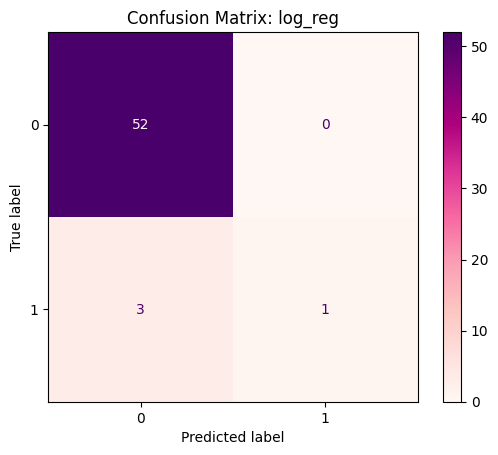

In [22]:
key = 'log_reg'
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dict[key])
disp.plot(cmap =plt.cm.RdPu )
plt.title(f'Confusion Matrix: {key}')
plt.show()

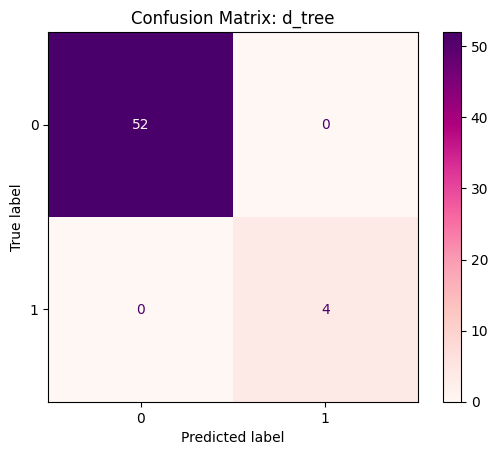

In [23]:
key = 'd_tree'
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dict[key])
disp.plot(cmap =plt.cm.RdPu )
plt.title(f'Confusion Matrix: {key}')
plt.show()

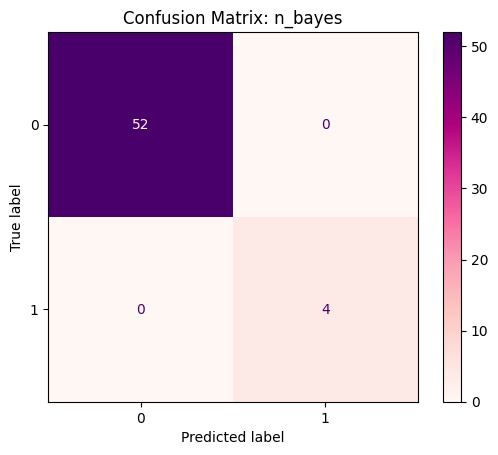

In [24]:
key = 'n_bayes'
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dict[key])
disp.plot(cmap =plt.cm.RdPu )
plt.title(f'Confusion Matrix: {key}')
plt.show()

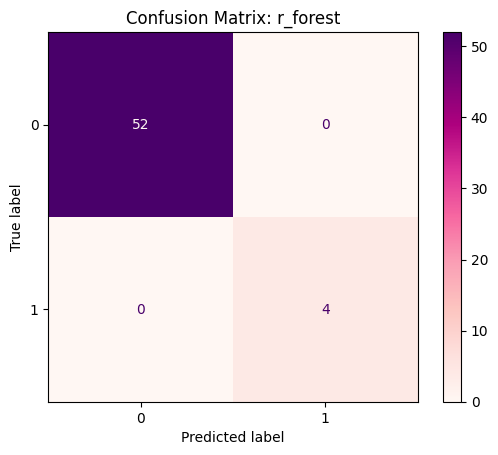

In [25]:
key = 'r_forest'
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dict[key])
disp.plot(cmap =plt.cm.RdPu )
plt.title(f'Confusion Matrix: {key}')
plt.show()



---



---



## Experiment 2: Cross Validation and Optimization




In [26]:
#
# Results Log:per model
#

logistic_reg_all_dict = {}
n_bayes_all_dict = {}
d_tree_all_dict = {}
r_forest_all_dict = {}

#Experiment 1
logistic_reg_all_dict['log_reg_1'] = metrics_dict['log_reg']
n_bayes_all_dict['n_bayes_1'] = metrics_dict['n_bayes']
d_tree_all_dict['d_tree_1'] = metrics_dict['d_tree']
r_forest_all_dict['r_forest_1'] = metrics_dict['r_forest']

In [27]:
#print(logistic_reg_all_dict)

In [28]:
#
# Results Log: Experiment 2a
#

experiment_2a_best_dict = {}

In [29]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#### 2a. K-Fold Cross Validation

In [30]:
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits)

##### Model: Logistic Regression

In [31]:
#### Logistic Regression
#Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

clf = LogisticRegression(random_state=random_state)

param_grid ={ 
    'penalty':['l1', 'l2', 'elasticnet'],  #Regularization  
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],   #Reg strength  
    'class_weight':['balanced', None],           #Imbalanced class: weighted 
    'solver': ['liblinear']
   }

grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='f1')
grid_search.fit(X_train,y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2a_1.: Logistic Regression ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best F1: 0.8076
LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   random_state=33, solver='liblinear')
Results: Experiment 2a_1.: Logistic Regression 
   Accuracy  Recall  Precision        F1  Log-loss
0  0.910714     1.0   0.444444  0.615385  0.407539


In [32]:
# Results
logistic_reg_all_dict['log_reg_2a'] = metrics
experiment_2a_best_dict['log_reg_2a'] = metrics

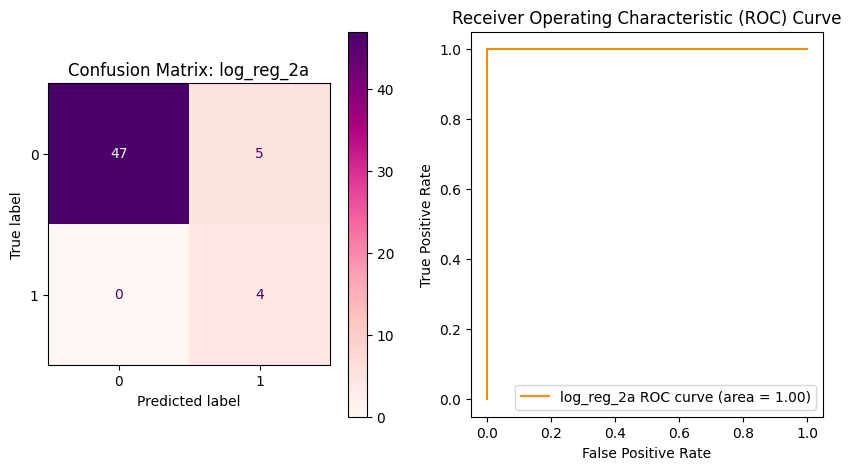

In [33]:
key = 'log_reg_2a'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_prob)
log_reg_2a_roc_auc = auc(fpr_1, tpr_1)

# Plot ROC curve
axs[1].plot(fpr_1, tpr_1, color='darkorange', label=f'{key} ROC curve (area = {log_reg_2a_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Model: Naive Bayes

In [34]:
### Naive Bayes
### Docs: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

clf = GaussianNB()

param_grid ={ 
    'priors':[[0.0815,0.9184], None],  #Regularization  
   }

grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='f1')
grid_search.fit(X_train,y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2a_2.: Naive Bayes ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'priors': None}
Best F1: 0.9333
GaussianNB()
Results: Experiment 2a_2.: Naive Bayes 
   Accuracy  Recall  Precision   F1      Log-loss
0       1.0     1.0        1.0  1.0  7.649225e-08


In [35]:
n_bayes_all_dict['n_bayes_2a'] = metrics
experiment_2a_best_dict['n_bayes_2a'] = metrics

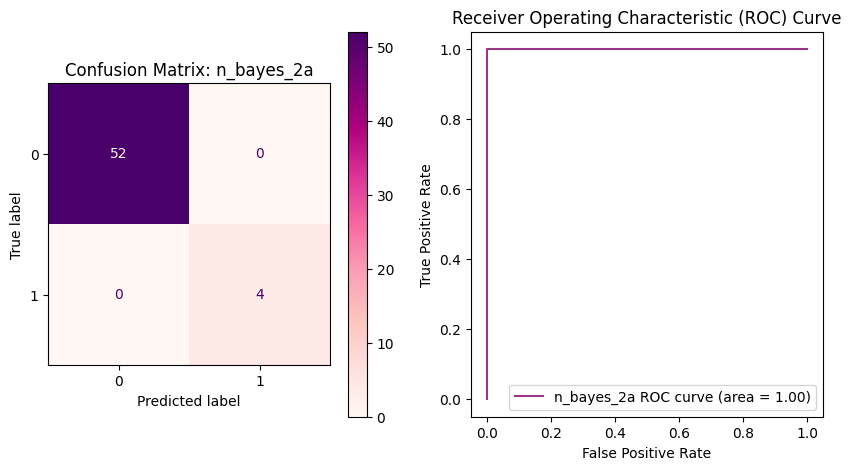

In [36]:
key = 'n_bayes_2a'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_prob)
n_bayes_2a_roc_auc = auc(fpr_2, tpr_2)

# Plot ROC curve
axs[1].plot(fpr_2, tpr_2, color='#9C3587', label=f'{key} ROC curve (area = {n_bayes_2a_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Model: Decision Tree

In [37]:
### Decision Trees
### Docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

clf = tree.DecisionTreeClassifier(random_state=random_state)

param_grid ={ 
    'criterion':["gini", "entropy"],  #splitting criterion
    'class_weight':[{0:0.9184,1: 0.0815},'balanced', None],    #Imbalanced class: weighted 
   }

grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='f1')
grid_search.fit(X_train,y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2a_3.: Decision Tree Classifier ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'class_weight': {0: 0.9184, 1: 0.0815}, 'criterion': 'gini'}
Best F1: 0.9600
DecisionTreeClassifier(class_weight={0: 0.9184, 1: 0.0815}, random_state=33)
Results: Experiment 2a_3.: Decision Tree Classifier 
   Accuracy  Recall  Precision   F1      Log-loss
0       1.0     1.0        1.0  1.0  2.220446e-16


In [38]:
d_tree_all_dict['d_tree_2a'] = metrics
experiment_2a_best_dict['d_tree_2a'] = metrics

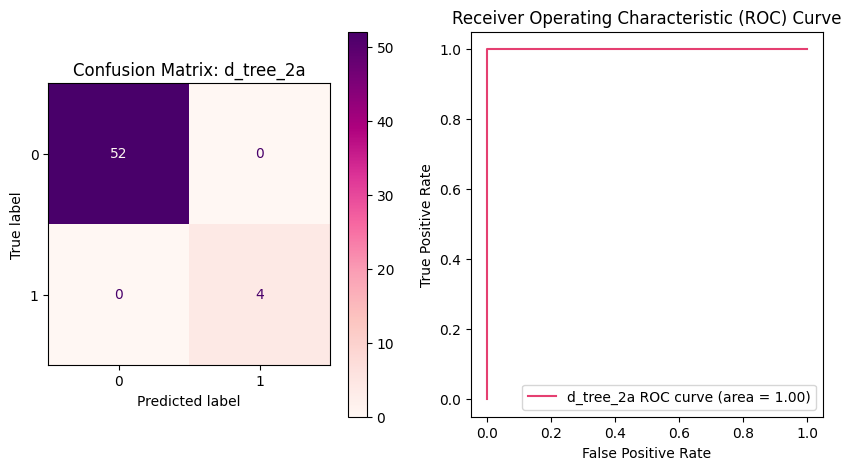

In [39]:
key = 'd_tree_2a'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_prob)
d_trees_2a_roc_auc = auc(fpr_3, tpr_3)

# Plot ROC curve
axs[1].plot(fpr_3, tpr_3, color='#E53F71', label=f'{key} ROC curve (area = {d_trees_2a_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Model: Random Forest

In [40]:
### Random Forest
### Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(random_state=random_state)

param_grid ={ 
    'criterion':["gini", "entropy"],  #splitting criterion
    'class_weight':[{0:0.9184,1: 0.0815},'balanced','balanced_subsample', None],    #Imbalanced class: weighted
    'bootstrap':[True,False] 
   }

grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='f1')
grid_search.fit(X_train,y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2a_4.: Random Forest Classifier ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'bootstrap': True, 'class_weight': {0: 0.9184, 1: 0.0815}, 'criterion': 'entropy'}
Best F1: 0.9333
RandomForestClassifier(class_weight={0: 0.9184, 1: 0.0815}, criterion='entropy',
                       random_state=33)
Results: Experiment 2a_4.: Random Forest Classifier 
   Accuracy  Recall  Precision   F1  Log-loss
0       1.0     1.0        1.0  1.0  0.037536


In [41]:
r_forest_all_dict['r_forest_2a'] = metrics
experiment_2a_best_dict['r_forest_2a'] = metrics

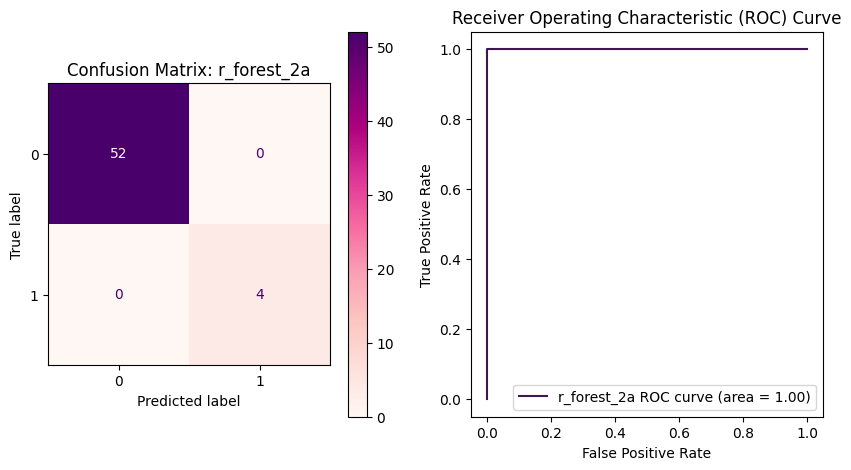

In [42]:
key = 'r_forest_2a'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_prob)
r_forest_2a_roc_auc = auc(fpr_4, tpr_4)

# Plot ROC curve
axs[1].plot(fpr_4, tpr_4, color='#3F1651', label=f'{key} ROC curve (area = {r_forest_2a_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Experiment 2a: Summary Results

In [43]:
#print('Results: Experiment 2a')
#experiment_2a_best_dict

In [44]:
exp_2_results = pd.DataFrame(experiment_2a_best_dict)
print('Experiment 2a: Stratified K-Fold Cross Validation')
print(exp_2_results)

Experiment 2a: Stratified K-Fold Cross Validation
           log_reg_2a    n_bayes_2a     d_tree_2a  r_forest_2a
Accuracy     0.910714  1.000000e+00  1.000000e+00     1.000000
Recall       1.000000  1.000000e+00  1.000000e+00     1.000000
Precision    0.444444  1.000000e+00  1.000000e+00     1.000000
F1           0.615385  1.000000e+00  1.000000e+00     1.000000
Log-loss     0.407539  7.649225e-08  2.220446e-16     0.037536


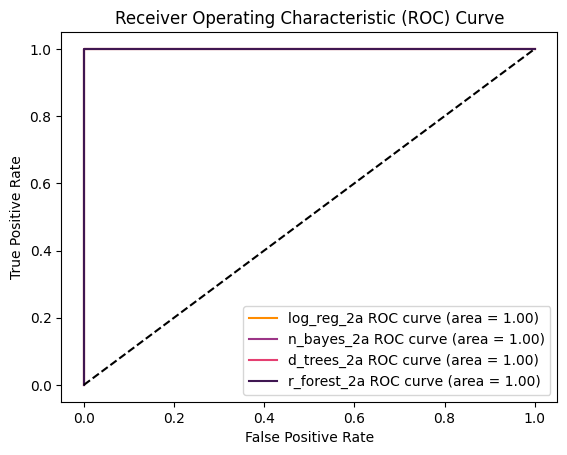

In [45]:
# Plot Summary ROC curve
plt.plot(fpr_1, tpr_1, color='darkorange', label=f'log_reg_2a ROC curve (area = {log_reg_2a_roc_auc :.2f})')
plt.plot(fpr_2, tpr_2, color='#9C3587', label=f'n_bayes_2a ROC curve (area = {n_bayes_2a_roc_auc :.2f})')
plt.plot(fpr_3, tpr_3, color='#E53F71', label=f'd_trees_2a ROC curve (area = {d_trees_2a_roc_auc :.2f})')
plt.plot(fpr_4, tpr_4, color='#3F1651', label=f'r_forest_2a ROC curve (area = {r_forest_2a_roc_auc :.2f})')
plt.plot([0, 1], [0, 1], 'k--') #random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

#### 2b. Leave One Out Cross Validation (LOOCV)

In [46]:
#
# Results Log: Experiment 2b
#

experiment_2b_best_dict = {}

##### Model: Logistic Regression

In [47]:
### Logistic Regression
clf = LogisticRegression(random_state=random_state)

param_grid ={ 
    'penalty':['l1', 'l2', 'elasticnet'],  #Regularization  
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],   #Reg strength  
    'class_weight':['balanced', None],           #Imbalanced class: weighted 
    'solver': ['liblinear']
   }

grid_search = GridSearchCV(clf, param_grid, cv=LeaveOneOut(), scoring='f1')


grid_search.fit(X_train,y_train)



print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)



y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2b_1.: Logistic Regression ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best F1: 0.0781
LogisticRegression(C=0.001, class_weight='balanced', random_state=33,
                   solver='liblinear')
Results: Experiment 2b_1.: Logistic Regression 
   Accuracy  Recall  Precision        F1  Log-loss
0     0.875     1.0   0.363636  0.533333  0.397526


In [48]:
logistic_reg_all_dict['log_reg_2b'] = metrics
experiment_2b_best_dict['log_reg_2b'] = metrics

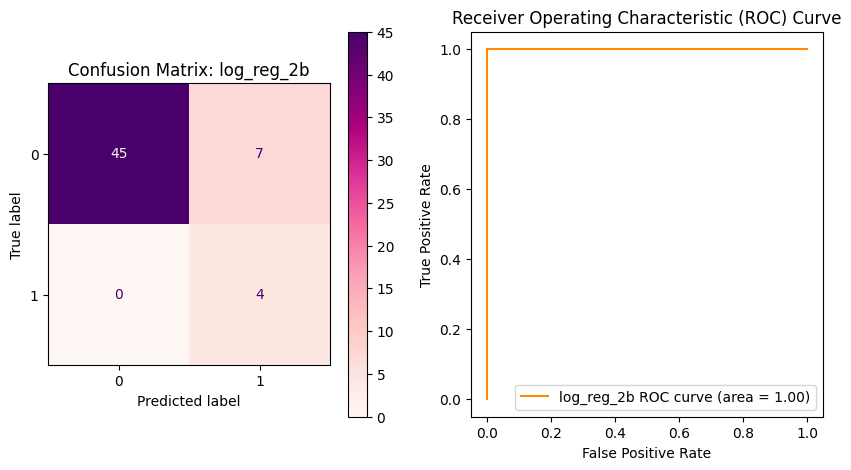

In [49]:
key = 'log_reg_2b'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_prob)
log_reg_2b_roc_auc = auc(fpr_5, tpr_5)

# Plot ROC curve
axs[1].plot(fpr_5, tpr_5, color='darkorange', label=f'{key} ROC curve (area = {log_reg_2b_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Model: Naive Bayes

In [50]:
### Naive Bayes
### Docs: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

clf = GaussianNB()

param_grid ={ 
    'priors':[[0.0815,0.9184], None],  #Regularization  
   }

grid_search = GridSearchCV(clf, param_grid, cv=LeaveOneOut(), scoring='f1')
grid_search.fit(X_train,y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2a_2.: Naive Bayes ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'priors': None}
Best F1: 0.0703
GaussianNB()
Results: Experiment 2a_2.: Naive Bayes 
   Accuracy  Recall  Precision   F1      Log-loss
0       1.0     1.0        1.0  1.0  7.649225e-08


In [51]:
n_bayes_all_dict['n_bayes_2b'] = metrics
experiment_2b_best_dict['n_bayes_2b'] = metrics

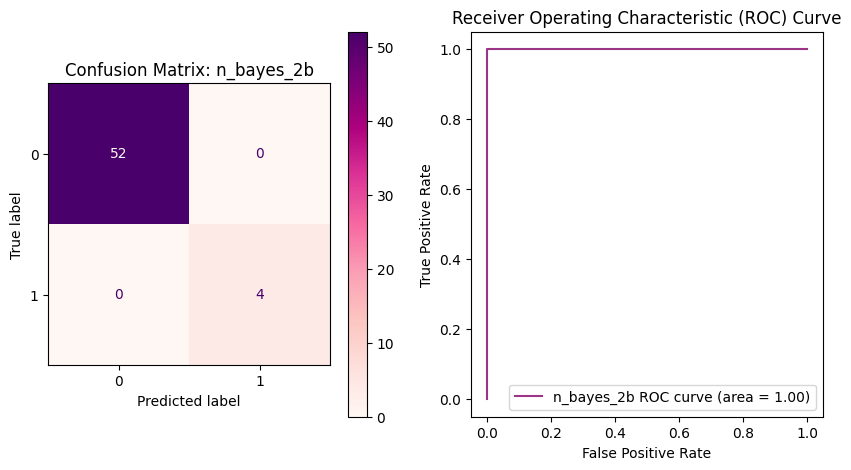

In [52]:
key = 'n_bayes_2b'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_prob)
n_bayes_2b_roc_auc = auc(fpr_6, tpr_6)

# Plot ROC curve
axs[1].plot(fpr_6, tpr_6, color='#9C3587', label=f'{key} ROC curve (area = {n_bayes_2b_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Model: Decision Tree

In [53]:
### Decision Trees
### Docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

clf = tree.DecisionTreeClassifier(random_state=random_state)

param_grid ={ 
    'criterion':["gini", "entropy"],  #splitting criterion
    'class_weight':[{0:0.9184,1: 0.0815},'balanced', None],    #Imbalanced class: weighted 
   }

grid_search = GridSearchCV(clf, param_grid, cv=LeaveOneOut(), scoring='f1')
grid_search.fit(X_train,y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2a_3.: Decision Tree Classifier ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'class_weight': {0: 0.9184, 1: 0.0815}, 'criterion': 'entropy'}
Best F1: 0.0781
DecisionTreeClassifier(class_weight={0: 0.9184, 1: 0.0815}, criterion='entropy',
                       random_state=33)
Results: Experiment 2a_3.: Decision Tree Classifier 
   Accuracy  Recall  Precision   F1      Log-loss
0       1.0     1.0        1.0  1.0  2.220446e-16


In [54]:
d_tree_all_dict['d_tree_2b'] = metrics
experiment_2b_best_dict['d_tree_2b'] = metrics

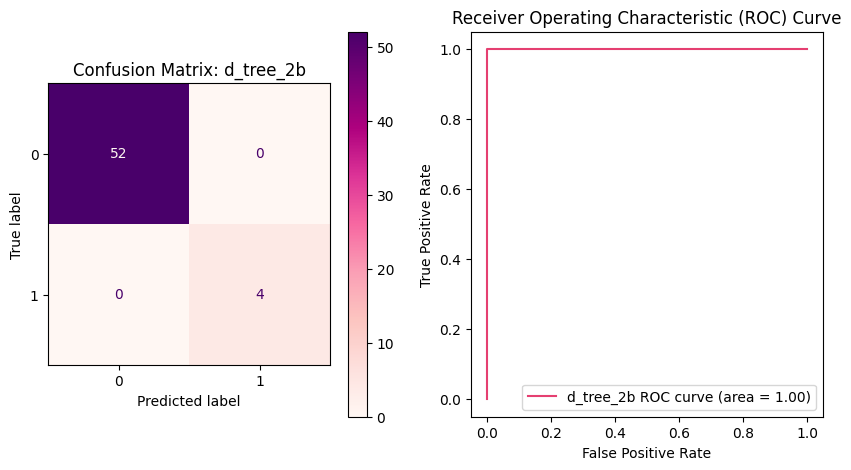

In [55]:
key = 'd_tree_2b'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_prob)
d_trees_2b_roc_auc = auc(fpr_7, tpr_7)

# Plot ROC curve
axs[1].plot(fpr_7, tpr_7, color='#E53F71', label=f'{key} ROC curve (area = {d_trees_2b_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Model: Random Forest

In [56]:
### Random Forest
### Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(random_state=random_state)

param_grid ={ 
    'criterion':["gini", "entropy"],  #splitting criterion
    'class_weight':[{0:0.9184,1: 0.0815},'balanced','balanced_subsample', None],    #Imbalanced class: weighted
    'bootstrap':[True,False] 
   }

grid_search = GridSearchCV(clf, param_grid, cv=LeaveOneOut(), scoring='f1')
grid_search.fit(X_train,y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1: {:.4f}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
y_pred = grid_search.best_estimator_.predict(X_test)
metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

print('Results: Experiment 2b_4.: Random Forest Classifier ')
print(pd.DataFrame(metrics,index=[0]))

Best hyperparameters:  {'bootstrap': True, 'class_weight': {0: 0.9184, 1: 0.0815}, 'criterion': 'gini'}
Best F1: 0.0703
RandomForestClassifier(class_weight={0: 0.9184, 1: 0.0815}, random_state=33)
Results: Experiment 2b_4.: Random Forest Classifier 
   Accuracy  Recall  Precision        F1  Log-loss
0  0.982143    0.75        1.0  0.857143  0.040056


In [57]:
r_forest_all_dict['r_forest_2b'] = metrics
experiment_2b_best_dict['r_forest_2b'] = metrics

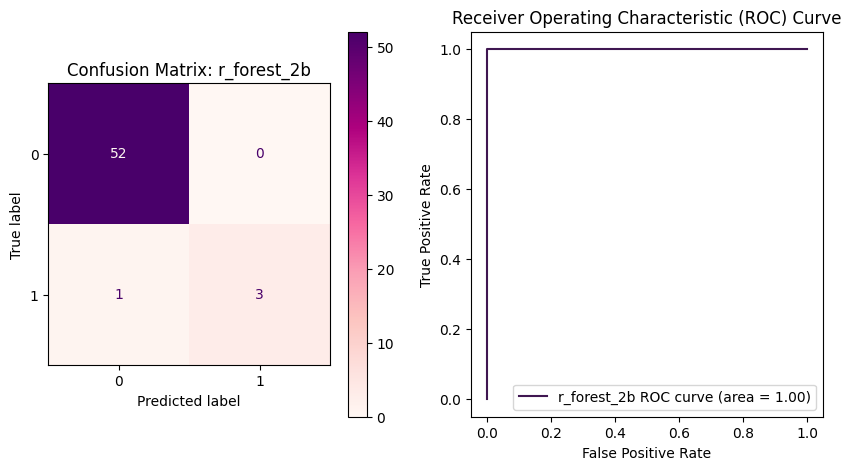

In [58]:
key = 'r_forest_2b'
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
disp.plot(cmap=plt.cm.RdPu, ax=axs[0])
axs[0].set_title(f'Confusion Matrix: {key}')

#ROC and AUROC calculations
fpr_8, tpr_8, thresholds = roc_curve(y_test, y_prob)
r_forest_2b_roc_auc = auc(fpr_8, tpr_8)

# Plot ROC curve
axs[1].plot(fpr_8, tpr_8, color='#3F1651', label=f'{key} ROC curve (area = {r_forest_2b_roc_auc :.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")

plt.show()

##### Experiment 2b: Summary Results

In [59]:
#print('Results: Experiment 2b')
#experiment_2b_best_dict

In [60]:
exp_2b_results = pd.DataFrame(experiment_2b_best_dict)
print('Experiment 2b: Leave One Out Cross Validation')
print(exp_2b_results)

Experiment 2b: Leave One Out Cross Validation
           log_reg_2b    n_bayes_2b     d_tree_2b  r_forest_2b
Accuracy     0.875000  1.000000e+00  1.000000e+00     0.982143
Recall       1.000000  1.000000e+00  1.000000e+00     0.750000
Precision    0.363636  1.000000e+00  1.000000e+00     1.000000
F1           0.533333  1.000000e+00  1.000000e+00     0.857143
Log-loss     0.397526  7.649225e-08  2.220446e-16     0.040056


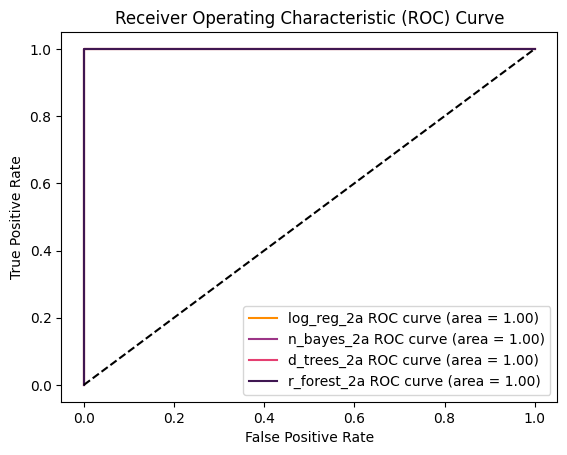

In [61]:
# Plot Summary ROC curve
plt.plot(fpr_5, tpr_5, color='darkorange', label=f'log_reg_2a ROC curve (area = {log_reg_2b_roc_auc :.2f})')
plt.plot(fpr_6, tpr_6, color='#9C3587', label=f'n_bayes_2a ROC curve (area = {n_bayes_2b_roc_auc :.2f})')
plt.plot(fpr_7, tpr_7, color='#E53F71', label=f'd_trees_2a ROC curve (area = {d_trees_2b_roc_auc :.2f})')
plt.plot(fpr_8, tpr_8, color='#3F1651', label=f'r_forest_2a ROC curve (area = {r_forest_2b_roc_auc :.2f})')
plt.plot([0, 1], [0, 1], 'k--') #random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

##### Experiment 2: Results by Model

In [62]:
#view log_r dcict ##delete later/or move
log_reg_results_all = pd.DataFrame(logistic_reg_all_dict)
print('Results by Model: Logistic Regression')
print(log_reg_results_all)

Results by Model: Logistic Regression
           log_reg_1  log_reg_2a  log_reg_2b
Accuracy    0.946429    0.910714    0.875000
Recall      0.250000    1.000000    1.000000
Precision   1.000000    0.444444    0.363636
F1          0.400000    0.615385    0.533333
Log-loss    0.070506    0.407539    0.397526


In [63]:
n_bayes_results_all = pd.DataFrame(n_bayes_all_dict)
print('Results by Model:  Naive Bayes ')
print(n_bayes_results_all)

Results by Model:  Naive Bayes 
              n_bayes_1    n_bayes_2a    n_bayes_2b
Accuracy   1.000000e+00  1.000000e+00  1.000000e+00
Recall     1.000000e+00  1.000000e+00  1.000000e+00
Precision  1.000000e+00  1.000000e+00  1.000000e+00
F1         1.000000e+00  1.000000e+00  1.000000e+00
Log-loss   7.649225e-08  7.649225e-08  7.649225e-08


In [65]:
d_tree_results_all = pd.DataFrame(d_tree_all_dict)
print('Results by Model: Decision Trees')
print(d_tree_results_all)

Results by Model: Decision Trees
               d_tree_1     d_tree_2a     d_tree_2b
Accuracy   1.000000e+00  1.000000e+00  1.000000e+00
Recall     1.000000e+00  1.000000e+00  1.000000e+00
Precision  1.000000e+00  1.000000e+00  1.000000e+00
F1         1.000000e+00  1.000000e+00  1.000000e+00
Log-loss   2.220446e-16  2.220446e-16  2.220446e-16


In [67]:
r_forest_results_all = pd.DataFrame(r_forest_all_dict)
print('Results by Model: Random Forest')
print(r_forest_results_all)

Results by Model: Random Forest
           r_forest_1  r_forest_2a  r_forest_2b
Accuracy     1.000000     1.000000     0.982143
Recall       1.000000     1.000000     0.750000
Precision    1.000000     1.000000     1.000000
F1           1.000000     1.000000     0.857143
Log-loss     0.039307     0.037536     0.040056


## Experiment 3: Top Model

In [68]:
#
# RESET: Train Test Split, and random state, test_size
#
random_state = 18
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.45,random_state= random_state)

In [69]:
#
# Best Classifications based on log-loss from previous experiments
#
classifiers = {'log_reg':LogisticRegression(random_state=33), #log_reg_1
                'd_tree': tree.DecisionTreeClassifier(class_weight={0: 0.9184, 1: 0.0815}, random_state=33), #d_tree_2a
                'n_bayes': GaussianNB(),
                'r_forest': RandomForestClassifier(class_weight={0: 0.9184, 1: 0.0815}, criterion='entropy',random_state=33) #r_forest_2a
                }


In [70]:
final_metrics_dict ={}
final_confusion_matrix_dict = {}

for key,value in classifiers.items():
  clf = value
  clf.fit(X_train,y_train)
  y_prob = clf.predict_proba(X_test)[:,1]
  y_pred = clf.predict(X_test)
  metrics,matrix = metrics_summary(y_test,y_pred,y_prob)

  final_metrics_dict[key] = metrics
  final_confusion_matrix_dict[key] = matrix

####Experiment 3:  Results

In [ ]:
#print('Results: Experiment 3')
#final_metrics_dict

In [71]:
exp_3_results = pd.DataFrame(final_metrics_dict)
print('Experiment 3: Best Overall Classifier')
print(exp_3_results)

Experiment 3: Best Overall Classifier
            log_reg        d_tree       n_bayes  r_forest
Accuracy   0.975904  1.000000e+00  1.000000e+00  0.987952
Recall     0.714286  1.000000e+00  1.000000e+00  0.857143
Precision  1.000000  1.000000e+00  1.000000e+00  1.000000
F1         0.833333  1.000000e+00  1.000000e+00  0.923077
Log-loss   0.060990  2.220446e-16  5.603559e-08  0.044188


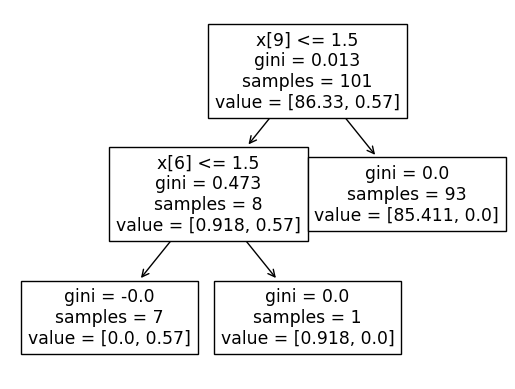

In [72]:
tree.plot_tree(classifiers['d_tree'])
plt.show()

In [73]:
importances = classifiers['d_tree'].feature_importances_
feat_names = X.columns
sorted(zip(importances, feat_names), reverse= True)

[(0.6209074813192169, 'OUT'),
 (0.37909251868078303, 'avg_rank'),
 (0.0, 'total_mcwins'),
 (0.0, 'total_mc'),
 (0.0, 'top_safe_ratio'),
 (0.0, 'mcwins_pct'),
 (0.0, 'age'),
 (0.0, 'WIN'),
 (0.0, 'SAFE'),
 (0.0, 'LOW'),
 (0.0, 'HIGH'),
 (0.0, 'BTM')]

> Final Result: **Decision Tree** is the best model for the dataset.